In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

Using TensorFlow backend.


# Import Data

The CIFAR10 dataset comes bundled with Keras. It has 50,000 training images and 10,000 test images. There are 10 classes like airplanes, automobiles, birds, cats, deer, dog, frog, horse, ship and truck. We will use the load_data function to load it into memory

In [2]:
from keras.datasets import cifar10
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

# Explore the Data

Check out the number of images in training and test data and also the number of classes and some sample images

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

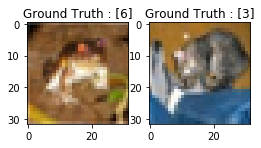

In [3]:
from keras.utils import to_categorical
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

#Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])
#Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

#Display the first image in test data
plt.subplot(122)
plt.imshow(test_images[0,:,:],cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

# Preprocess the Data

Perform normalization on data and convert the labels to categorical variables to be used in Keras

In [4]:
# Find the shape of input images and create the variable input shape
nRows, nCols, nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0],nRows,nCols,nDims)
input_shape = (nRows, nRows, nDims)

#Change to float data type
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /=255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#Display the change in the label
print('Original Label 0 :', train_labels[0])
print('After conversion to one hot : ', train_labels_one_hot[0])


Original Label 0 : [6]
After conversion to one hot :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Define the Model

Create the model with Conv layer, max pooling layer, dropout layer and dense(Fully connected) layer

In [5]:
def createModel():
    model = Sequential()
    # The first 2 layers with 32 filters of window size 3x3
    model.add(Conv2D(32,(3,3),padding = 'same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32,(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3),padding = 'same', activation='relu'))
    model.add(Conv2D(64,(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3),padding = 'same', activation='relu'))
    model.add(Conv2D(64,(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5)) #You can play around with this and check the effect of Dropout
    model.add(Dense(nClasses,activation='softmax'))
    
    return model

# Train the Model

In [6]:
model1 = createModel()
batch_size = 256
epochs = 50
model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs = epochs, verbose = 1, validation_data = (test_data,test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

50000/50000 [==============================] - 62s 1ms/step - loss: 0.4936 - acc: 0.8299 - val_loss: 0.6894 - val_acc: 0.7764
Epoch 43/50
50000/50000 [==============================] - 62s 1ms/step - loss: 0.5018 - acc: 0.8267 - val_loss: 0.6894 - val_acc: 0.7884
Epoch 44/50
50000/50000 [==============================] - 62s 1ms/step - loss: 0.4947 - acc: 0.8299 - val_loss: 0.6641 - val_acc: 0.7931
Epoch 45/50
50000/50000 [==============================] - 62s 1ms/step - loss: 0.4915 - acc: 0.8295 - val_loss: 0.6279 - val_acc: 0.7956
Epoch 46/50
50000/50000 [==============================] - 62s 1ms/step - loss: 0.4884 - acc: 0.8301 - val_loss: 0.6345 - val_acc: 0.7979
Epoch 47/50
50000/50000 [==============================] - 62s 1ms/step - loss: 0.4861 - acc: 0.8329 - val_loss: 0.6774 - val_acc: 0.7822
Epoch 48/50
50000/50000 [==============================] - 62s 1ms/step - loss: 0.4869 - acc: 0.8329 - val_loss: 0.5945 - val_acc: 0.8124
Epoch 49/50
50000/50000 [=====================

[0.6669416716098785, 0.7912]

# Check Loss and Accuracy Curves

Text(0.5, 1.0, 'Loss Curves')

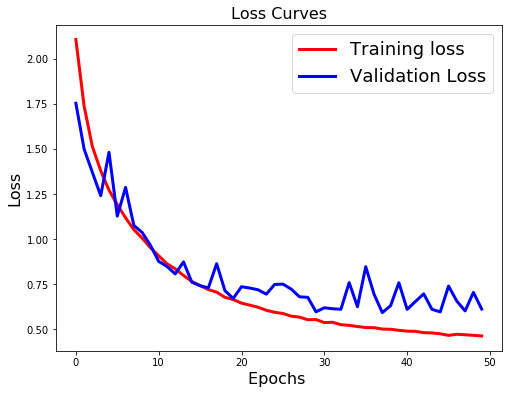

In [12]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

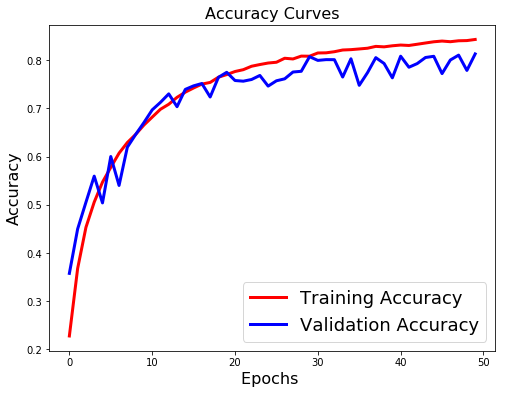

In [13]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

From the above curves, we can see that there is a considerable difference between the training and validation loss. This indicates that the network has tried to memorize the training data and thus, is able to get better accuracy on it. This is a sign of Overfitting. But we have already used Dropout in the network, then why is it still overfitting. Let us see if we can further reduce overfitting using something else.

One of the major reasons for overfitting is that you don’t have enough data to train your network. Apart from regularization, another very effective way to counter Overfitting is Data Augmentation. It is the process of artificially creating more images from the images you already have by changing the size, orientation etc of the image. It can be a tedious task but fortunately, this can be done in Keras using the ImageDataGenerator instance.

# Train Using Data Augmentation

Here we use the ImageDataGenerator class in Keras to perform Data Augmentation. We perform horizontal and vertical shift of the image and also flipping the image randomly.

In [8]:
from keras.preprocessing.image import ImageDataGenerator

model2 = createModel()

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

batch_sise = 256
epochs = 50

datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
#         rotation_range=10, # randomly rotate images in the range (degrees 0 to 180)
          width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
          horizontal_flip=True, # randomly flip images horizontally
          vertical_flip=False) # randomly flip images vertically

#datagen.fit(train_data)

# Fit model on the batches generated by datagen.flow()
history2 = model2.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size), 
                                steps_per_epoch=int(np.ceil(train_data.shape[0]/float(batch_size))), 
                                epochs=epochs, 
                                validation_data=(test_data, test_labels_one_hot),
                                workers=4)
model2.evaluate(test_data, test_labels_one_hot)

Epoch 1/50
196/196 [==============================] - 69s 351ms/step - loss: 2.0887 - acc: 0.2279 - val_loss: 1.7365 - val_acc: 0.3683
Epoch 2/50
196/196 [==============================] - 67s 340ms/step - loss: 1.7582 - acc: 0.3630 - val_loss: 1.6137 - val_acc: 0.4201
Epoch 3/50
196/196 [==============================] - 70s 357ms/step - loss: 1.5938 - acc: 0.4238 - val_loss: 1.3783 - val_acc: 0.4974
Epoch 4/50
196/196 [==============================] - 63s 323ms/step - loss: 1.4648 - acc: 0.4730 - val_loss: 1.3280 - val_acc: 0.5133
Epoch 5/50
196/196 [==============================] - 63s 322ms/step - loss: 1.3691 - acc: 0.5093 - val_loss: 1.6547 - val_acc: 0.4726
Epoch 6/50
196/196 [==============================] - 62s 319ms/step - loss: 1.2964 - acc: 0.5359 - val_loss: 1.1986 - val_acc: 0.5671
Epoch 7/50
196/196 [==============================] - 63s 320ms/step - loss: 1.2403 - acc: 0.5585 - val_loss: 1.1131 - val_acc: 0.6067
Epoch 8/50
196/196 [==============================] - 6

[0.5980495309114456, 0.8016]

# Plot Loss and Accuracy Curves

Text(0.5, 1.0, 'Loss Curves')

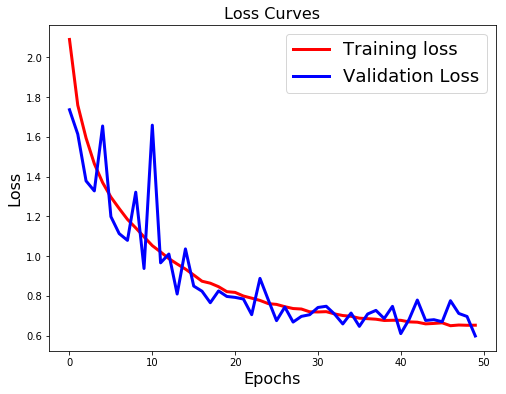

In [9]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves', fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

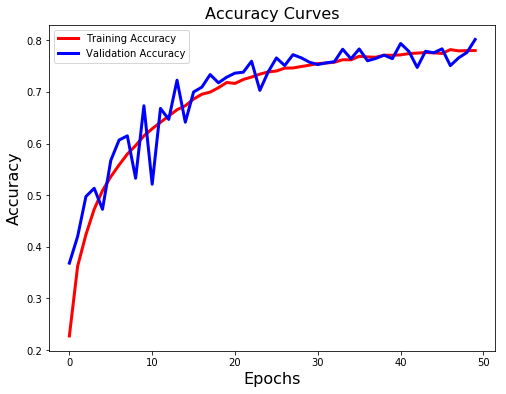

In [10]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

The test accuracy is greater than training accuracy. This means that the model has generalized very well. This comes from the fact that the model has been trained on much worse data ( for example – flipped images ), so it is finding the normal test data easier to classify.